# Presentation of the test results - 
In this part - 2 of our project review, we trained the following four classification models by tuning different hyperparameters- 
- Linear Classifier/SVM
- K Nearest Neighbors
- Random Forest
- Decision Tree

In [8]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the cleaned dataset

group_16_df = pd.read_csv('Group_16_data_cleaned.csv')
group_16_df.head()

,Unnamed: 0,Subject,Hold .,Hold t,Hold i,Hold e,Hold Shift,Hold 5,Hold Shift.1,Hold Caps,...,Size Caps,Size r,Size o,Size a,Size n,Size l,Size Enter,AvH,AvP,AvA
0,0,1.0,106.0,92.0,111.0,85.0,123.0,82.0,70.0,101.00,...,0.225806,0.225806,0.322581,0.290323,0.225806,0.354839,0.274194,103.035714,0.190971,0.288018
1,1,1.0,106.0,88.0,111.0,83.0,123.0,101.0,81.0,94.00,...,0.225806,0.225806,0.322581,0.322581,0.258065,0.387097,0.322581,103.035714,0.186514,0.285138
2,2,1.0,106.0,90.0,111.0,65.0,79.0,73.0,96.0,63.25,...,0.225806,0.193548,0.290323,0.322581,0.225806,0.258065,0.274194,103.035714,0.186171,0.285138
3,3,1.0,106.0,81.0,111.0,72.0,83.0,94.0,89.0,104.00,...,0.225806,0.225806,0.258065,0.290323,0.225806,0.322581,0.322581,103.035714,0.177943,0.285138
4,4,1.0,106.0,72.0,111.0,82.0,62.0,89.0,68.0,88.00,...,0.290323,0.225806,0.322581,0.258065,0.225806,0.290323,0.387097,103.035714,0.163971,0.285138


In [3]:
# extracting and assigning the input and output variables from the dataset

x, y = group_16_df.iloc[:, 2:].values, group_16_df['Subject'].values
x.shape, y.shape

((2856, 71), (2856,))

In [4]:
# splitting the imported dataset as train(70%) and test(30%) sets.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 222)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1999, 71) (1999,)
(857, 71) (857,)


In [5]:
# Standard scaler is used to scale all the features to have equal weightage

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

First we implemented a Naive Classifier model. There are different ways to implement this, like - Random Prediction Algorithm, Zero Rule Algorithm. We've chosen Random Prediction Algorithm which is as follows.

In [6]:
# Naive/Baseline classifier implementation:
from random import randrange

# Generating random predictions out of y.
unique = list(set(y_train))
y_pred = []
for _ in y_test:
    index = randrange(len(unique))
    y_pred.append(unique[index])
print(accuracy_score(y_pred, y_test))

0.019836639439906652


#### This low accuracy is obvious considering the facts that our dataset is well balanced and has 56 classes in total.

### Comparision of accuracy scores of the four models on the test data. 

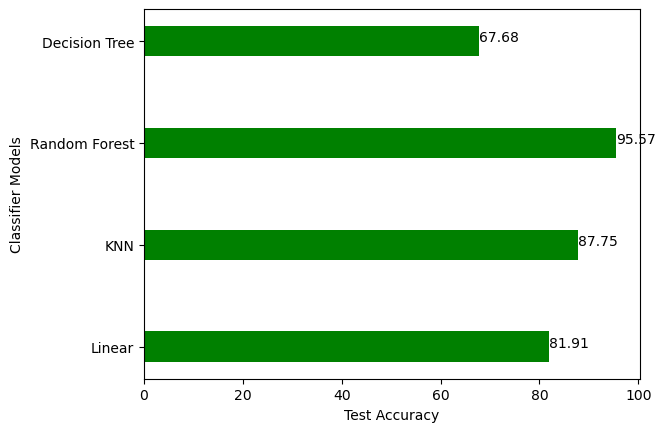

In [7]:
lin_clf = SGDClassifier(loss = 'hinge', max_iter = 100, penalty = 'l2', random_state = 222)
KNN = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 9, p = 1)
RF = RandomForestClassifier(random_state = 222, n_estimators = 290, max_depth = 60)
DT = tree.DecisionTreeClassifier(random_state = 222, min_samples_split = 4, max_depth = 23, criterion = 'gini')

clf_list = [lin_clf, KNN, RF, DT]
ax = ['Linear', 'KNN', 'Random Forest', 'Decision Tree']
ay = []
for clf in clf_list:
    clf.fit(x_train, y_train)
    pred_test = clf.predict(x_test)
    test_acc = accuracy_score(pred_test, y_test)
    ay.append(round(test_acc*100, 2))
    
plt.barh(ax, ay, color ='g', height = 0.3)
for index, value in enumerate(ay):
    plt.text(value, index, str(value))
plt.xlabel('Test Accuracy')
plt.ylabel('Classifier Models')
plt.show()